In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import math as mt
import matplotlib.pyplot as plt

2.6.0


In [2]:
StartingValues=np.load('startingvaluesUniVariate.npy')
print(StartingValues)

[[ 0.36999885  0.06088184 -0.27843507 ...  0.05552605  0.27597337
   0.46055534]
 [ 0.41627211 -0.32638021  0.30962175 ...  0.10310086 -0.32621497
  -0.0346609 ]
 [ 0.45123417  0.28628765 -0.34419823 ...  0.17506217 -0.22866537
   0.30101809]
 ...
 [ 0.2657931  -0.06870523 -0.13819409 ...  0.24828656  0.03992342
   0.29094948]
 [-0.12807186  0.42792914  0.27162283 ... -0.05987048 -0.47285047
  -0.04101031]
 [ 0.38745462  0.36525259 -0.33679535 ... -0.19790725 -0.3148698
  -0.31740994]]


Now calculate the outputs...

In [3]:
Y=np.load('outputsUniVariate.npy')
print(Y)

[0.77322275 0.13960061 0.22053087 ... 0.37118548 0.44038337 0.84606551]


In [4]:
import os
os.getcwd()

'/home/jovyan/work/notebooks'

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import initializers
from tensorflow.keras.layers import Input, Add
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [6]:
#Custom activation function
vector_z=[0.25,0.25,0.25,0.25,0,0,0] #This is the vector z we need to choose in Example 2.12
vector_psi=[0.25,0.25,0.25,0.25,0,0,0] #This is the vector that encodes the function psi in Example 2.12
psi=tf.constant(vector_psi)
z=tf.constant(vector_z)   

def custom_fct(x):
    psi_mat=tf.expand_dims(psi, axis=0)
    psi_mat_t=tf.transpose(psi_mat)
    #psi_mat_batch=tf.broadcast_to(psi_mat, [3,1,3])
    tmp=tf.matmul(x,psi_mat_t)
    tmp2=K.maximum(tf.zeros_like(tmp),1-K.exp(-tmp))  
    tmp3=tmp2*z
    return tmp3#tf.math.scalar_mul(tmp4, z)

In [7]:
approxDim=7 #This is the approximation dimension, the number of basis functions we consider

models = []
for k in range(1,31,1):
    inputs =  tf.keras.Input(shape=(7,))
    nodes = [] 
    #After each node is a lambda layer that implements our activation function
    lambda_layers= []
    #Final linear forms that are applied
    linear_form_layers=[]
    for j in range(k):
        node = Dense(approxDim, activation=None,trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str('node')+str(j))
        lamb= Lambda(custom_fct,name=str('activation')+str(j))
        lin= Dense(1, activation=None,trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      use_bias=False,
                      name=str('linearForm')+str(j))
        nodes = nodes + [node]
        lambda_layers=lambda_layers + [lamb]
        linear_form_layers=linear_form_layers + [lin]


    all_linear_form_outputs=[]
    for j in range(k):
        output_linearmap=nodes[j](inputs)
        output_activation=lambda_layers[j](output_linearmap)
        output_linear_form=linear_form_layers[j](output_activation)
        all_linear_form_outputs=all_linear_form_outputs+[output_linear_form]
    

    #print(all_linear_form_outputs)  
    add_layer=Add()

    if k>1:
        finalOutput=add_layer(all_linear_form_outputs)
    else:
        finalOutput=all_linear_form_outputs[0]
#print(finalOutput)
                              
    model = Model(inputs=inputs, outputs=finalOutput)
    model.compile(optimizer='adam',loss='mean_squared_error')
    models = models + [model]


In [8]:
models[0].summary()
models[29].summary()
len(models)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
node0 (Dense)                (None, 7)                 56        
_________________________________________________________________
activation0 (Lambda)         (None, 7)                 0         
_________________________________________________________________
linearForm0 (Dense)          (None, 1)                 7         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 7)]    

30

In [9]:
import time

In [10]:
for k in range(0,len(models),1):
    tic = time.perf_counter()
    models[k].fit(StartingValues, Y, epochs=50, batch_size=10000)
    toc = time.perf_counter()
    print(f"Calc time: {(toc - tic)/60.0:0.4f} minutes")

2022-02-13 22:40:49.394159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.0830
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0657
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0656
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0656
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0655
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0655
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0654
Epoch 8/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0654
Epoch 9/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0654
Epoch 10/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0654
Epoch 11/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0653
Epoch 12/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0653
E

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Epoch 46/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Epoch 47/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Epoch 48/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Epoch 49/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Epoch 50/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0642
Calc time: 7.3856 minutes
Epoch 1/50
1000/1000 [==============================] - 10s 9ms/step - loss: 0.1393
Epoch 2/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0700
Epoch 3/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0671
Epoch 4/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0658
Epoch 5/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0648
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/ste

1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 38/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 39/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 40/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 41/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 42/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 43/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 44/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 45/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 46/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 47/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0642
Epoch 48/50
1000/1000 [==============================] - 10s 10ms/

1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 33/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 34/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 35/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 36/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 37/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 38/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 39/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 40/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 41/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 42/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0642
Epoch 43/50
1000/1000 [==============================] - 11s 11ms/

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 28/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 29/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 30/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 31/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 32/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0642
Epoch 33/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 34/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 35/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0642
Epoch 36/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 37/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0642
Epoch 38/50
1000/1000 [==============================] - 12s 12ms/

Epoch 22/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 23/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0642
Epoch 24/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 25/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 26/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 27/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0642
Epoch 28/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 29/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0642
Epoch 30/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 31/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 32/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0642
Epoch 33/50
1000/1000 [==============================]

Epoch 11/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 12/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0642
Epoch 13/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 14/50
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0642
Epoch 15/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 16/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 17/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 18/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 19/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 20/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 21/50
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0642
Epoch 22/50
1000/1000 [==============================]

1000/1000 [==============================] - 22s 22ms/step - loss: 0.0642
Calc time: 17.2514 minutes
Epoch 1/50
1000/1000 [==============================] - 23s 21ms/step - loss: 0.0767
Epoch 2/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0647
Epoch 3/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0643
Epoch 4/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0643
Epoch 5/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 6/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 7/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 8/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 9/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 10/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Epoch 11/50
1000/1000 [=========================

Epoch 45/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0642
Epoch 46/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0642
Epoch 47/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0642
Epoch 48/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0642
Epoch 49/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0642
Epoch 50/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0642
Calc time: 18.5093 minutes
Epoch 1/50
1000/1000 [==============================] - 25s 22ms/step - loss: 0.0920
Epoch 2/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0660
Epoch 3/50
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0647
Epoch 4/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0644
Epoch 5/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0643
Epoch 6/50
1000/1000 [==========

Epoch 34/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0642
Epoch 35/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0642
Epoch 36/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0642
Epoch 37/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0642
Epoch 38/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0642
Epoch 39/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0642
Epoch 40/50
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0642
Epoch 41/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0642
Epoch 42/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0642
Epoch 43/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0642
Epoch 44/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0642
Epoch 45/50
1000/1000 [==============================]

In [11]:
tmp=np.load('startingvaluesMultiVariateTestset100000Sim0.npy')
print(tmp[0])

[ 0.43121012 -0.37309724 -0.10956286 -0.09821822  0.45122483 -0.23397051
  0.09587285]


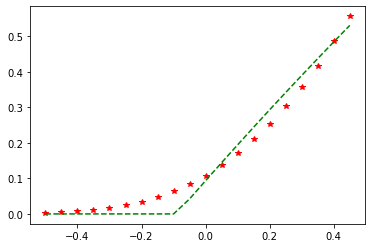

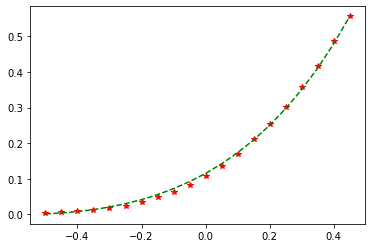

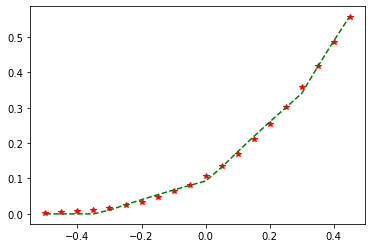

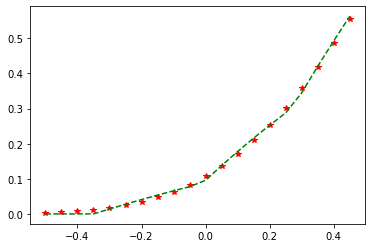

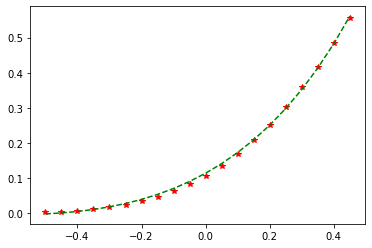

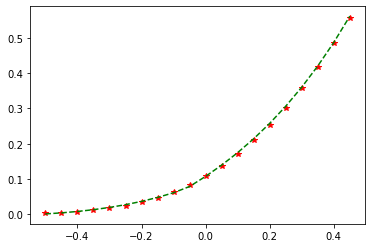

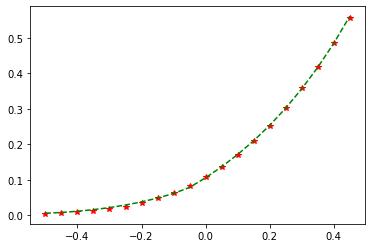

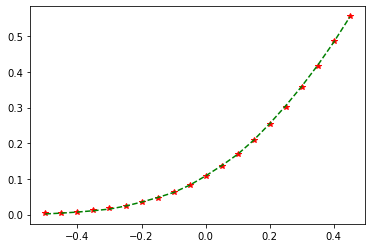

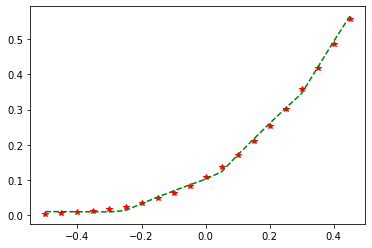

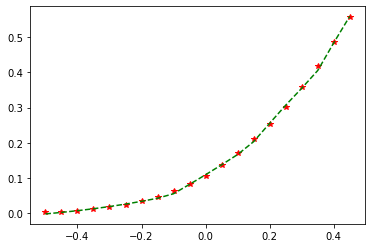

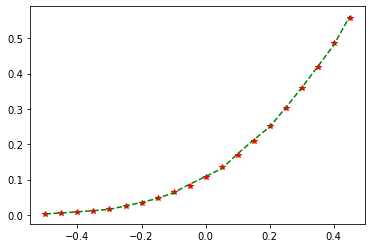

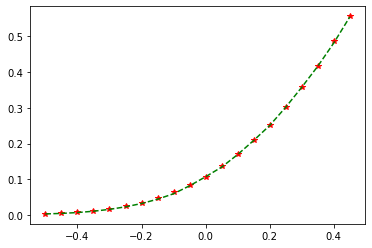

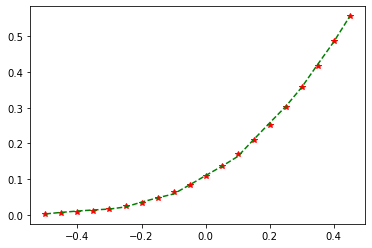

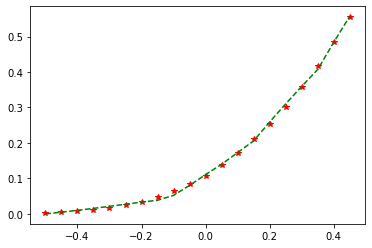

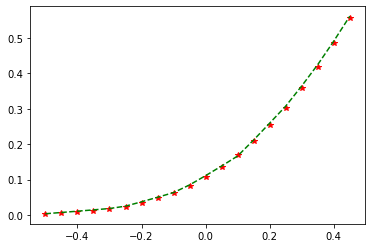

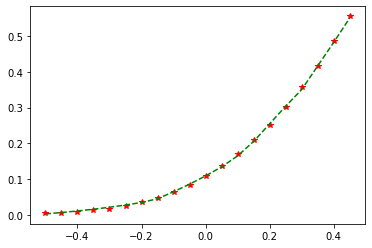

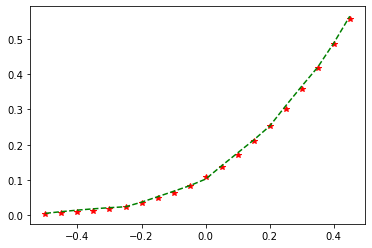

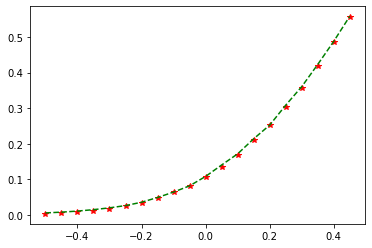

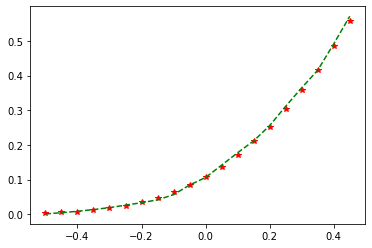

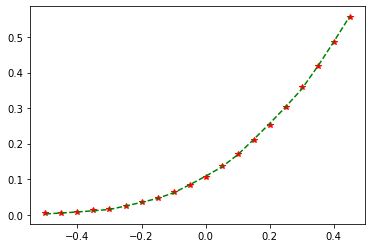

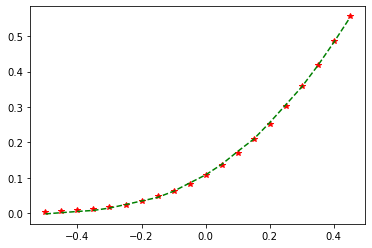

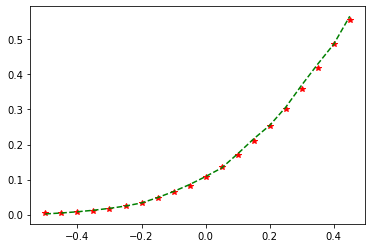

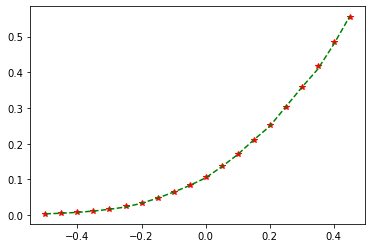

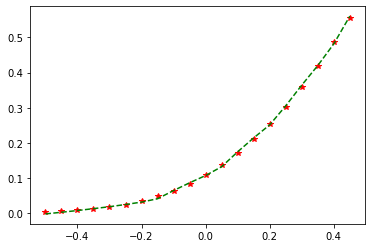

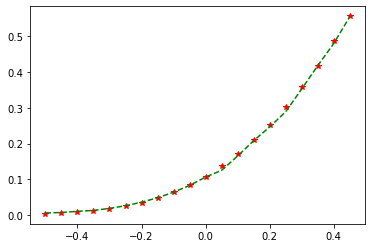

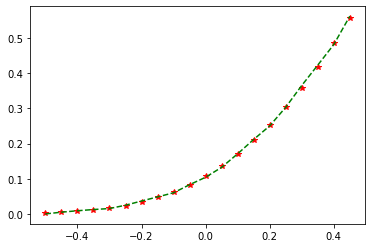

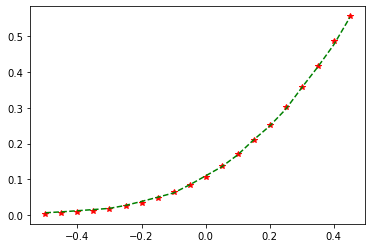

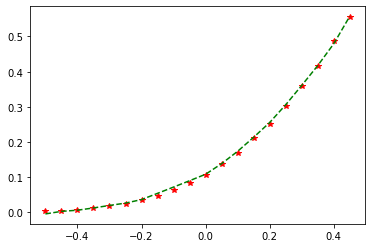

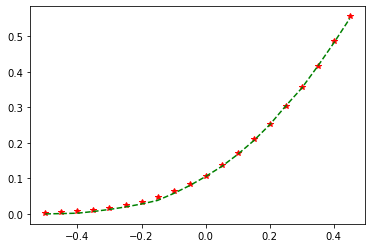

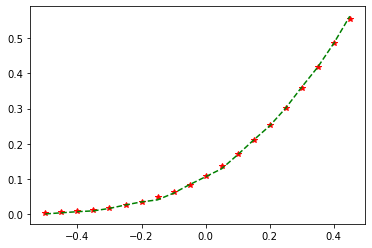

In [13]:
xvalues=np.load('UnivariatexValuesE1.npy')
MCprices=np.load('UnivariateMCprices1.npy')
gridsize=20

testinput=tf.reshape(tf.constant(xvalues),[gridsize,7])
prediction0=models[0](testinput)
prediction1=models[1](testinput)
prediction2=models[2](testinput)
prediction3=models[3](testinput)
prediction4=models[4](testinput)
prediction5=models[5](testinput)
prediction6=models[6](testinput)
prediction7=models[7](testinput)
prediction8=models[8](testinput)
prediction9=models[9](testinput)
prediction10=models[10](testinput)
prediction11=models[11](testinput)
prediction12=models[12](testinput)
prediction13=models[13](testinput)
prediction14=models[14](testinput)
prediction15=models[15](testinput)
prediction16=models[16](testinput)
prediction17=models[17](testinput)
prediction18=models[18](testinput)
prediction19=models[19](testinput)
prediction20=models[20](testinput)
prediction21=models[21](testinput)
prediction22=models[22](testinput)
prediction23=models[23](testinput)
prediction24=models[24](testinput)
prediction25=models[25](testinput)
prediction26=models[26](testinput)
prediction27=models[27](testinput)
prediction28=models[28](testinput)
prediction29=models[29](testinput)
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction0.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction1.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction2.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction3.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction4.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction5.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction6.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction7.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction8.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction9.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction10.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction11.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction12.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction13.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction14.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction15.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction16.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction17.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction18.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction19.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction20.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction21.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction22.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction23.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction24.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction25.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction26.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction27.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction28.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction29.numpy().flatten(),'g--')
plt.show()

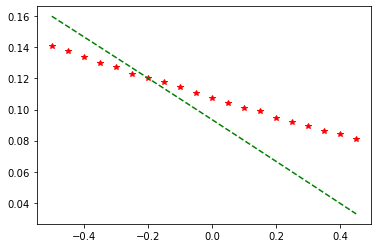

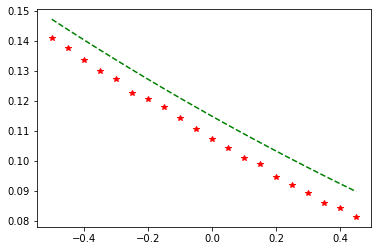

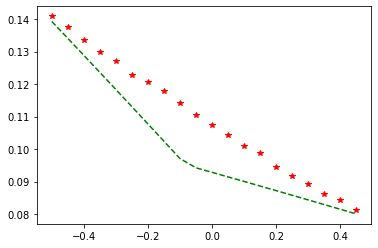

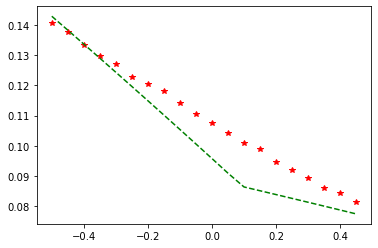

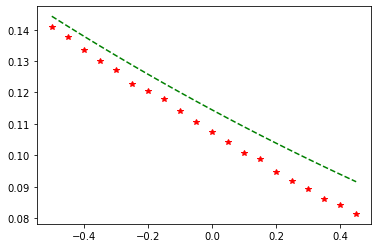

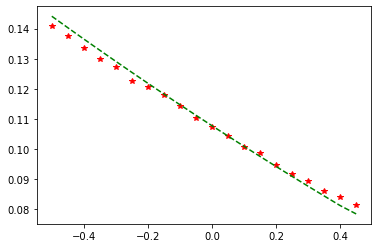

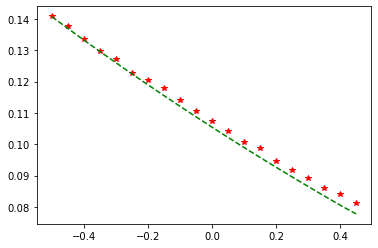

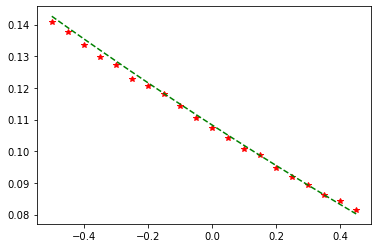

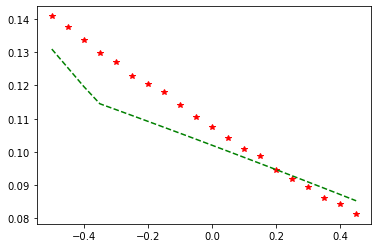

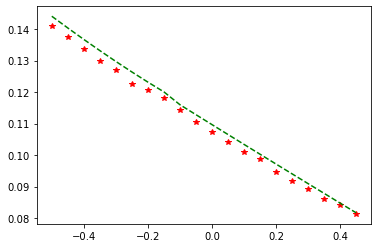

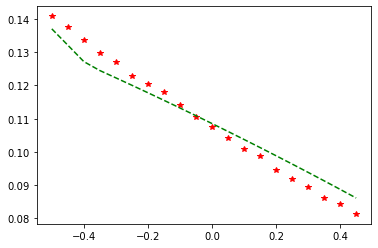

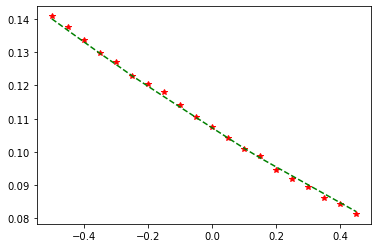

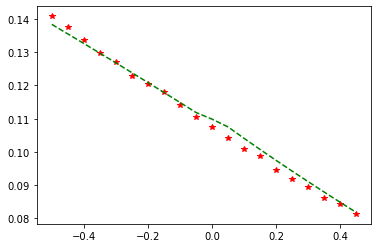

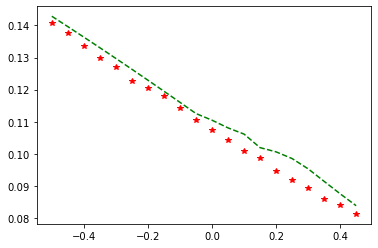

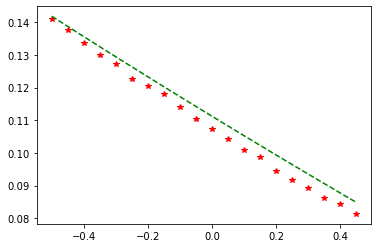

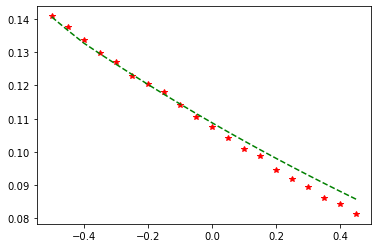

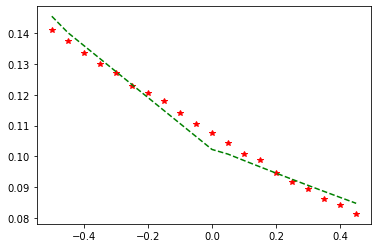

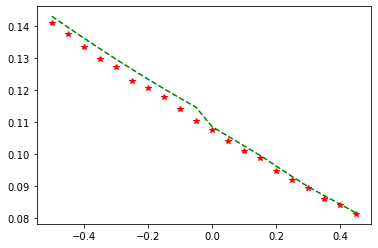

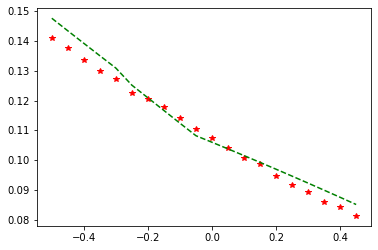

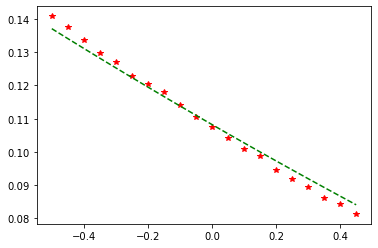

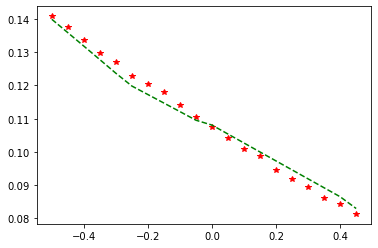

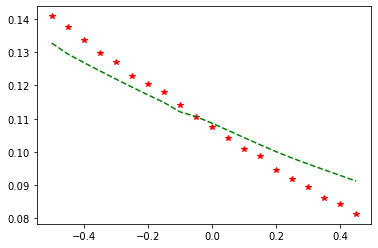

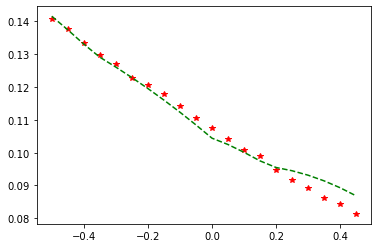

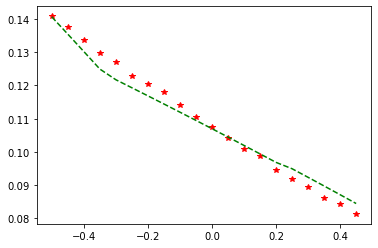

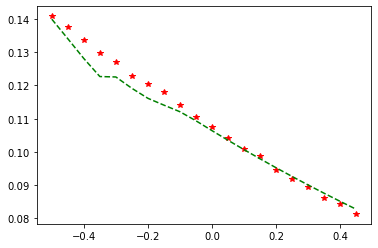

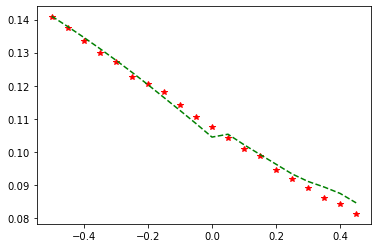

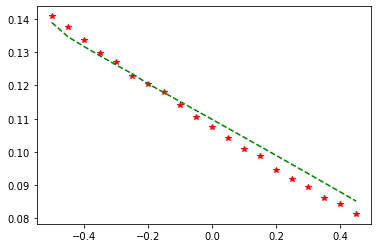

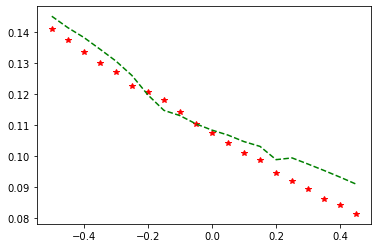

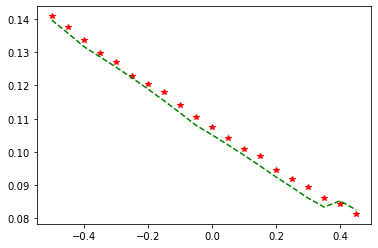

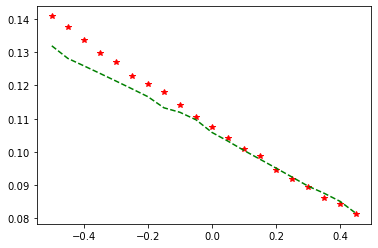

In [14]:
xvalues=np.load('UnivariatexValuesE2.npy')
MCprices=np.load('UnivariateMCprices2.npy')
gridsize=20

testinput=tf.reshape(tf.constant(xvalues),[gridsize,7])
prediction0=models[0](testinput)
prediction1=models[1](testinput)
prediction2=models[2](testinput)
prediction3=models[3](testinput)
prediction4=models[4](testinput)
prediction5=models[5](testinput)
prediction6=models[6](testinput)
prediction7=models[7](testinput)
prediction8=models[8](testinput)
prediction9=models[9](testinput)
prediction10=models[10](testinput)
prediction11=models[11](testinput)
prediction12=models[12](testinput)
prediction13=models[13](testinput)
prediction14=models[14](testinput)
prediction15=models[15](testinput)
prediction16=models[16](testinput)
prediction17=models[17](testinput)
prediction18=models[18](testinput)
prediction19=models[19](testinput)
prediction20=models[20](testinput)
prediction21=models[21](testinput)
prediction22=models[22](testinput)
prediction23=models[23](testinput)
prediction24=models[24](testinput)
prediction25=models[25](testinput)
prediction26=models[26](testinput)
prediction27=models[27](testinput)
prediction28=models[28](testinput)
prediction29=models[29](testinput)
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction0.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction1.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction2.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction3.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction4.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction5.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction6.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction7.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction8.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction9.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction10.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction11.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction12.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction13.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction14.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction15.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction16.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction17.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction18.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction19.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction20.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction21.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction22.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction23.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction24.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction25.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction26.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction27.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction28.numpy().flatten(),'g--')
plt.show()
plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction29.numpy().flatten(),'g--')
plt.show()

In [15]:
#MCpricesTestset=np.load('outputsMultiVariateTestset.npy')
#xvaluesTestset=np.load('startingvaluesMultiVariateTestset.npy')
startingValues=np.zeros([9600,7])
MCprices=np.zeros([9600])
for k in range(0,30,1):
    tmpstring="% s" % k
    filename1="startingvaluesUniVariateTestset100000Sim"+tmpstring+".npy"
    filename2="outputsUniVariateTestset100000Sim"+tmpstring+".npy"
    tmp1=np.load(filename1)
    tmp2=np.load(filename2)
    startingValues[k*320:(k+1)*320]=tmp1
    MCprices[k*320:(k+1)*320]=tmp2


    

[1.02561503e-03 4.82989162e-05 6.92983231e-05 5.24864518e-05
 4.63545184e-05 1.33158946e-05 1.24472799e-05 6.43057729e-06
 4.92240542e-05 2.36449887e-05 1.27540470e-05 7.57734460e-06
 1.15691983e-05 4.47741913e-05 1.56803362e-05 1.32175164e-05
 2.50767753e-05 1.17962800e-05 4.12465524e-05 8.37149491e-06
 1.84074379e-05 2.57677148e-05 1.67449343e-05 1.88748545e-05
 2.15630880e-05 2.50564244e-05 2.56488438e-05 2.36627257e-05
 1.79551444e-05 2.01817529e-05]


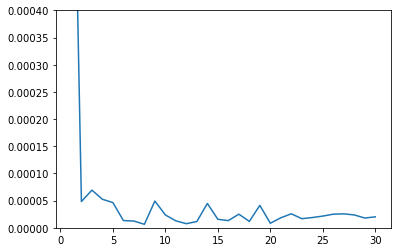

In [16]:
mctf=tf.reshape(tf.constant(MCprices),[MCprices.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mses=np.zeros(30)
for k in range(0,30,1):
    predictions=models[k](startingValues)
    mses[k]=mse(predictions, mctf).numpy()
print(mses)
xvalues=range(1,31,1)
plt.ylim([0., 0.0004])
plt.plot(xvalues,mses)
plt.show()




7
2.046949464329373e-05


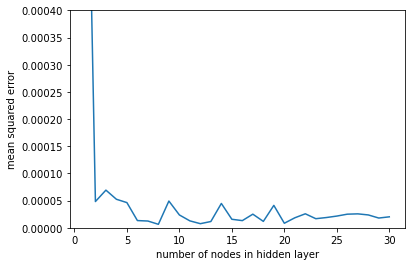

In [17]:
xvalues=range(1,31,1)
print(np.argmin(mses))
print(np.average(mses[9:29]))
fig=plt.figure()
ax=plt.axes()
plt.ylim([0., 0.0004])
ax.set(xlabel='number of nodes in hidden layer', ylabel='mean squared error',
       title='')
ax.plot(xvalues,mses)
plt.show()

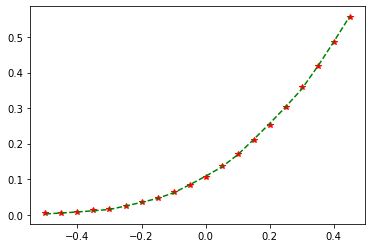

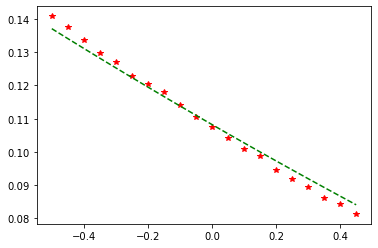

In [18]:
xvalues=np.load('UnivariatexValuesE1.npy')
MCprices=np.load('UnivariateMCprices1.npy')
gridsize=20
testinput=tf.reshape(tf.constant(xvalues),[gridsize,7])
prediction19=models[19](testinput)

plt.plot(xvalues[:,0],MCprices,'r*',xvalues[:,0],prediction19.numpy().flatten(),'g--')
plt.show()


xvalues=np.load('UnivariatexValuesE2.npy')
MCprices=np.load('UnivariateMCprices2.npy')
gridsize=20
testinput=tf.reshape(tf.constant(xvalues),[gridsize,7])
prediction19=models[19](testinput)

plt.plot(xvalues[:,1],MCprices,'r*',xvalues[:,1],prediction19.numpy().flatten(),'g--')
plt.show()

In [19]:
np.save('outputsUniVariateTestset100000Simulations',MCprices)